In [1]:
! pip install pandas

For an interview focused on geochemistry and anomaly detection, you might receive various types of datasets. 


Here are some examples of the data you could be sent and what each type can be used for:

### 1. **Geochemical Data**
   - **Description:** Contains measurements of different elements or compounds in rock or soil samples. Data might include concentrations of metals, minerals, or other geochemical markers.
   - **Example Data:**
     - Element concentrations (e.g., Cu, Au, Zn, Pb)
     - Sample locations (coordinates)
     - Depth of sample
     - Sample identifiers

   - **Use Cases:**
     - Identify patterns or trends in the concentration of elements.
     - Detect anomalies indicating potential ore deposits.

### 2. **Hyperspectral Data**
   - **Description:** Contains information from sensors that measure light across a range of wavelengths, providing detailed spectral information about the surface materials.
   - **Example Data:**
     - Spectral reflectance values at various wavelengths for each pixel
     - Images of the study area with spectral data

   - **Use Cases:**
     - Classify materials based on their spectral signature.
     - Detect and map mineralogical features.

### 3. **Drill Core Data**
   - **Description:** Includes data from drilling operations, such as core samples with measurements of different geological attributes.
   - **Example Data:**
     - Core sample depth intervals
     - Mineralogy and geochemistry of each interval
     - Structural data (e.g., fractures, veining)

   - **Use Cases:**
     - Analyze the distribution of minerals and their association with geological structures.
     - Model ore deposit distribution.

### 4. **Geophysical Data**
   - **Description:** Includes measurements from geophysical surveys, such as magnetic, gravity, or electromagnetic surveys.
   - **Example Data:**
     - Magnetic intensity measurements
     - Gravity anomalies
     - Electromagnetic conductivity values

   - **Use Cases:**
     - Interpret subsurface geological structures.
     - Integrate with geochemical data to identify target areas.

### 5. **Geological Mapping Data**
   - **Description:** Contains geological maps with different rock types, faults, and other geological features.
   - **Example Data:**
     - Rock types and their spatial distribution
     - Fault lines and structural features
     - Geological units

   - **Use Cases:**
     - Correlate geological features with geochemical anomalies.
     - Assess the geological context of the data.

### 6. **Time-Series Data**
   - **Description:** Measurements taken over time to observe changes in geochemical or geophysical parameters.
   - **Example Data:**
     - Temporal changes in element concentrations
     - Variations in spectral data over time

   - **Use Cases:**
     - Analyze trends and temporal anomalies.
     - Study the effects of external factors (e.g., mining activities) on geochemical data.

### 7. **Annotated Data**
   - **Description:** Data with known labels or classifications, such as areas known to have high mineralization.
   - **Example Data:**
     - Labels indicating high-grade ore zones
     - Annotations of known anomalies or deposits

   - **Use Cases:**
     - Train and test machine learning models for classification or anomaly detection.
     - Validate predictions and findings with known data.

### What to Do with the Data
- **Exploration and Visualization:** Start by exploring the dataset to understand its structure. Use visualizations like histograms, scatter plots, or maps to get a sense of the data distribution and identify initial patterns or anomalies.
- **Preprocessing:** Clean the data by handling missing values, outliers, and normalizing or standardizing if needed.
- **Analysis:** Apply statistical methods or machine learning techniques to detect patterns, correlations, or anomalies. Techniques could include PCA, clustering, regression, or anomaly detection algorithms.
- **Validation:** Cross-check your findings with known geological information or use statistical validation methods.


### 1. **Geochemical Data**

Data:A sample (generated randomly), includes depth and many mineral concentration
Problem: find the depth of differet mineral deposits, and anomaly detection. Best depth for sulfide, LI, , and Ni.

Workflow:

1: cleaning


2:plot

3:statistical analysis

3:Anomaly detection

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
! pip instl seaborn

ERROR: unknown command "instl" - maybe you meant "install"



In [2]:
path_data_Geochem=r"C:\Repos\Data\ML_repo_geo\geochemicaldata.csv"

In [6]:
data_Geochem=pd.read_csv(path_data_Geochem)
data_Geochem=data_Geochem[['DEPTH','CTS', 'CTNI','CTCU','CTNA', 'CTZN','CTK','CTMG']]
data_Geochem.head()

,DEPTH,CTS,CTNI,CTCU,CTNA,CTZN,CTK,CTMG
0,0.0287,0.2587,4.9855,1.9149,0.3306,3.9054,2.8734,0.8929
1,0.0384,0.5857,2.9899,0.9230,0.0901,1.3598,1.2612,0.7006
2,0.0466,0.5614,5.0657,1.7284,0.5727,2.4880,4.2477,1.2536
3,0.0565,0.6006,4.2609,1.8098,0.2351,2.2978,4.0530,1.0790
4,0.0679,0.3762,7.5326,2.2492,0.1401,1.4433,4.0882,1.7773


In [7]:
import pandas as pd

# Melt the DataFrame to long format
data_melted=pd.melt(data_Geochem, id_vars=['DEPTH'], var_name='mineral', value_name='value')
# Check the reshaped data
print(data_melted.head())


    DEPTH mineral   value
0  0.0287     CTS  0.2587
1  0.0384     CTS  0.5857
2  0.0466     CTS  0.5614
3  0.0565     CTS  0.6006
4  0.0679     CTS  0.3762


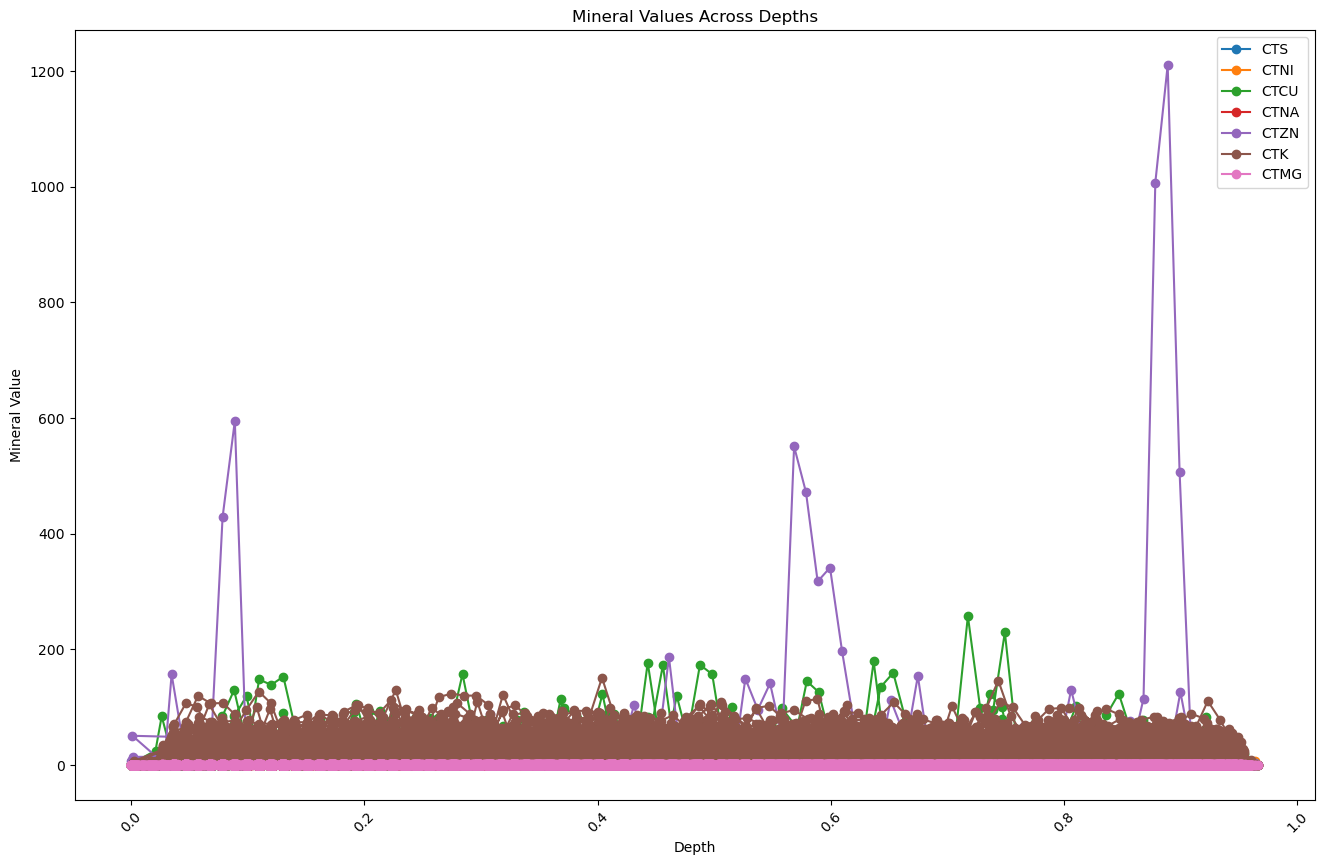

In [17]:
plt.figure(figsize=(16, 10))  # Adjust size as needed


plt.plot(data_Geochem['DEPTH'], data_Geochem['CTS'], marker='o', label='CTS')
plt.plot(data_Geochem['DEPTH'], data_Geochem['CTNI'], marker='o', label='CTNI')
plt.plot(data_Geochem['DEPTH'], data_Geochem['CTCU'], marker='o', label='CTCU')
plt.plot(data_Geochem['DEPTH'], data_Geochem['CTNA'], marker='o', label='CTNA')
plt.plot(data_Geochem['DEPTH'], data_Geochem['CTZN'], marker='o', label='CTZN')
plt.plot(data_Geochem['DEPTH'], data_Geochem['CTK'], marker='o', label='CTK')
plt.plot(data_Geochem['DEPTH'], data_Geochem['CTMG'], marker='o', label='CTMG')


# Set labels and title
plt.xlabel('Depth')
plt.ylabel('Mineral Value')
plt.title('Mineral Values Across Depths')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability (if necessary)
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [18]:
# Fill missing values with the median of the column
data_Geochem.fillna(data_Geochem.median(), inplace=True)

# Alternatively, drop rows with missing values
# data.dropna(inplace=True)


In [34]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler, Normalizer

In [37]:
# Initialize the scaler
from sklearn.preprocessing import StandardScaler

minerals = data_Geochem.drop(columns=['DEPTH'])
depth = data_Geochem['DEPTH']

scaler = StandardScaler()

# Fit and transform the minerals data
scaled_minerals = scaler.fit_transform(minerals)

# Convert the scaled data back to a DataFrame
minerals_scaled = pd.DataFrame(scaled_minerals, columns=minerals.columns)

# Combine the DEPTH column with the scaled minerals data
data_scaled = pd.concat([depth.reset_index(drop=True), minerals_scaled], axis=1)

# Check the scaled data
print(data_scaled.head())


    DEPTH       CTS      CTNI      CTCU      CTNA      CTZN       CTK  \
0  0.0287 -0.678822 -0.878267 -0.337244 -0.329906  0.085530 -1.175217   
1  0.0384 -0.476125 -1.781948 -0.502240 -1.213255 -0.176081 -1.283658   
2  0.0466 -0.491188 -0.841949 -0.368267  0.559320 -0.060136 -1.082778   
3  0.0565 -0.466889 -1.206392 -0.354727 -0.680674 -0.079683 -1.095874   
4  0.0679 -0.605988  0.275155 -0.281636 -1.029606 -0.167500 -1.093506   

       CTMG  
0  0.481012  
1 -0.054224  
2  1.484962  
3  0.998991  
4  2.942596  


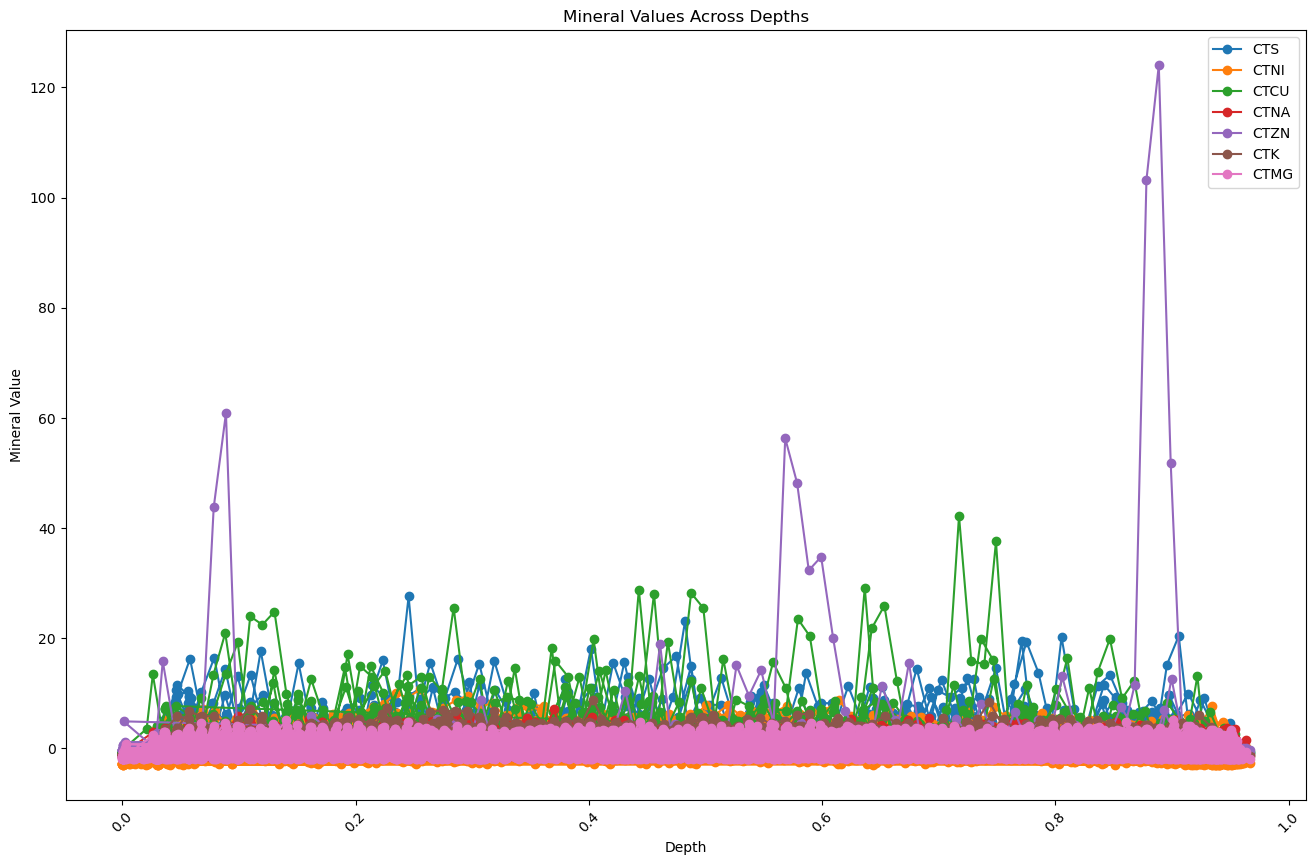

In [38]:
plt.figure(figsize=(16, 10))  # Adjust size as needed


plt.plot(data_scaled['DEPTH'], data_scaled['CTS'], marker='o', label='CTS')
plt.plot(data_scaled['DEPTH'], data_scaled['CTNI'], marker='o', label='CTNI')
plt.plot(data_scaled['DEPTH'], data_scaled['CTCU'], marker='o', label='CTCU')
plt.plot(data_scaled['DEPTH'], data_scaled['CTNA'], marker='o', label='CTNA')
plt.plot(data_scaled['DEPTH'], data_scaled['CTZN'], marker='o', label='CTZN')
plt.plot(data_scaled['DEPTH'], data_scaled['CTK'], marker='o', label='CTK')
plt.plot(data_scaled['DEPTH'], data_scaled['CTMG'], marker='o', label='CTMG')


# Set labels and title
plt.xlabel('Depth')
plt.ylabel('Mineral Value')
plt.title('Mineral Values Across Depths')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability (if necessary)
plt.xticks(rotation=45)

# Show the plot
plt.show()


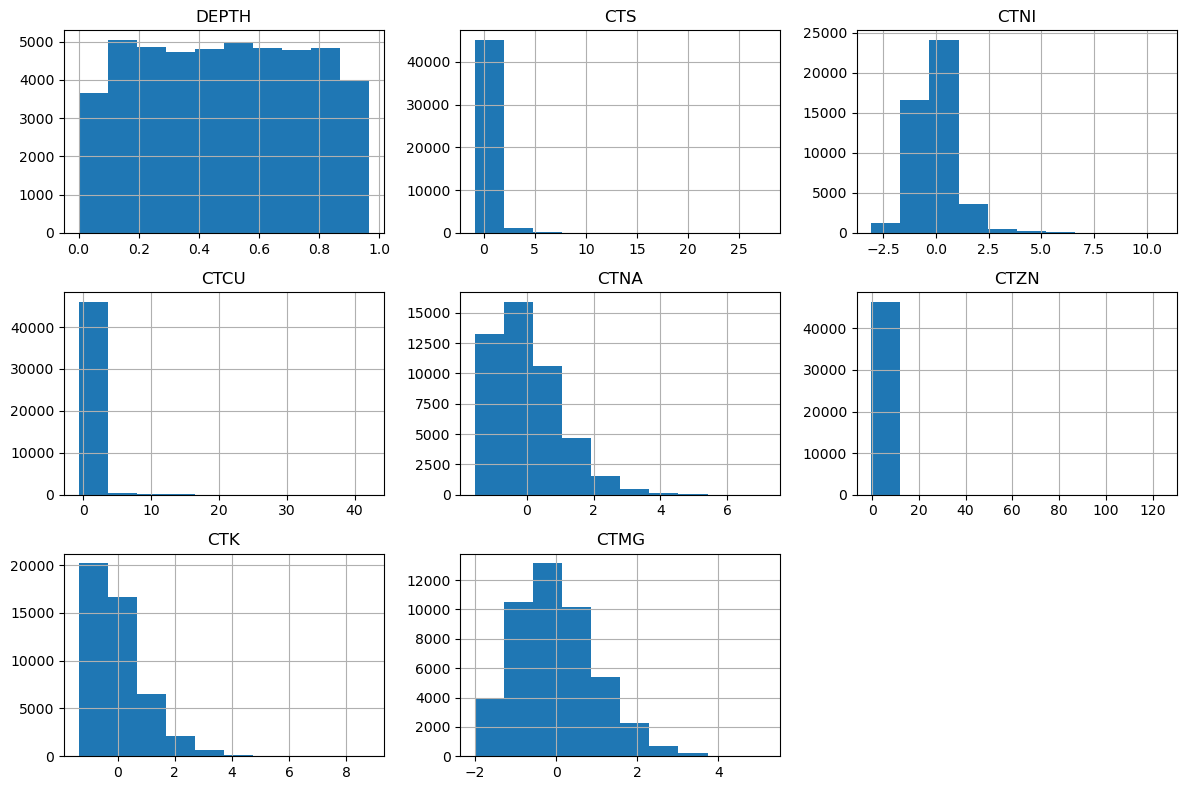

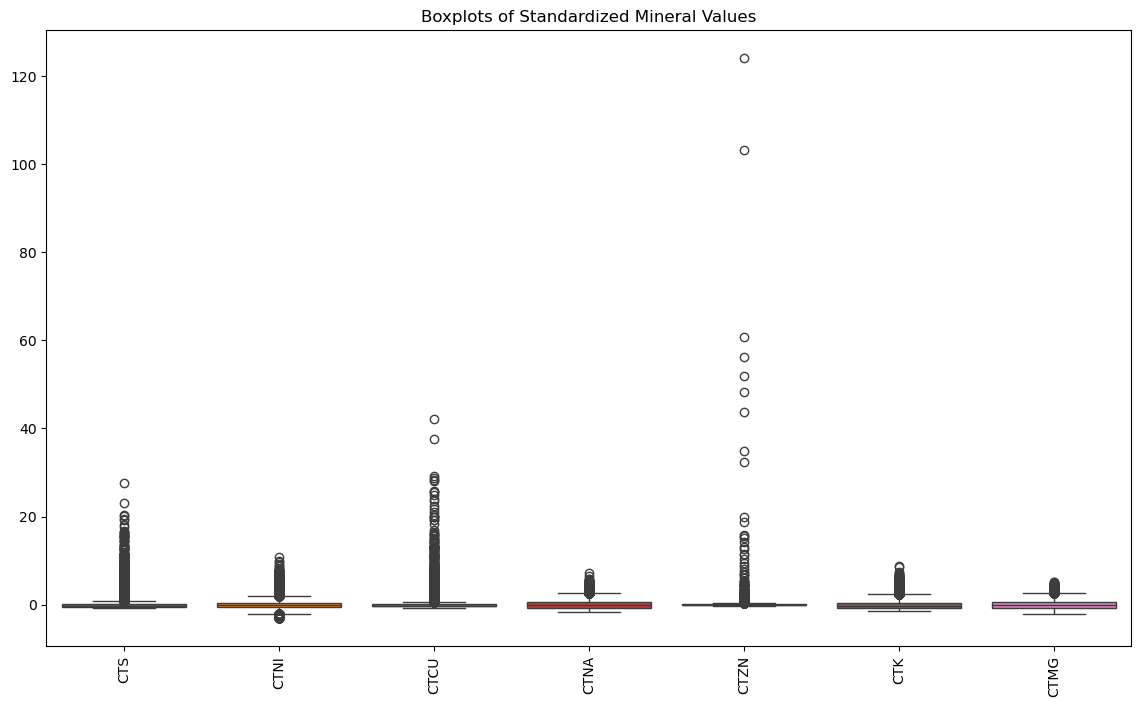

In [41]:
# Histograms
data_scaled.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplots for checking outliers
import seaborn as sns
plt.figure(figsize=(14, 8))  # Adjust size as needed
sns.boxplot(data=data_scaled.drop(columns=['DEPTH']))
plt.xticks(rotation=90)
plt.title('Boxplots of Standardized Mineral Values')
plt.show()


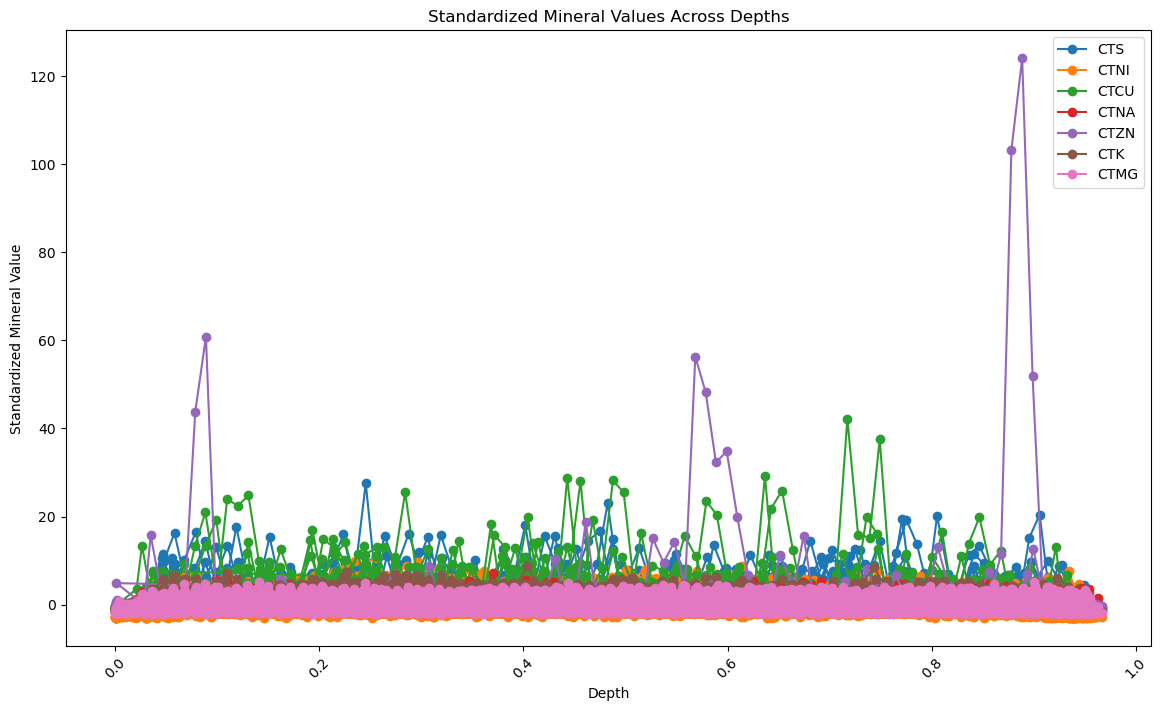

In [40]:
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(14, 8))  # Adjust size as needed

# Plot each mineral
for column in data_scaled.columns[1:]:  # Exclude the first column (DEPTH)
    plt.plot(data_scaled['DEPTH'], data_scaled[column], marker='o', label=column)

# Set labels and title
plt.xlabel('Depth')
plt.ylabel('Standardized Mineral Value')
plt.title('Standardized Mineral Values Across Depths')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability (if necessary)
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [52]:
# Z-Score Method
from scipy import stats

z_scores = stats.zscore(data_scaled)
abs_z_scores = np.abs(z_scores)
anomalies = (abs_z_scores > 3).all(axis=1)
data_scaled.columns['anomaly_zscore'] = anomalies


TypeError: Index does not support mutable operations

In [55]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05)
anomalies = iso_forest.fit_predict(data_scaled)
data_scaled['anomaly_iso_forest'] = anomalies


In [56]:
# Plot data with anomalies highlighted
sns.scatterplot(x='feature1', y='feature2', hue='anomaly_iso_forest', data=data_scaled)
plt.title('Anomalies Detected by Isolation Forest')
plt.show()


ValueError: Could not interpret value `feature1` for `x`. An entry with this name does not appear in `data`.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(16, 10))  # Adjust size as needed

# Create the boxplot
sns.boxplot(x='DEPTH', y='value', hue='mineral', data=data_melted, palette='Set2')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Depth')
plt.ylabel('Mineral Value')
plt.title('Distribution of Mineral Values Across Depths')

# Show the plot
plt.show()


KeyboardInterrupt: 

KeyboardInterrupt: 

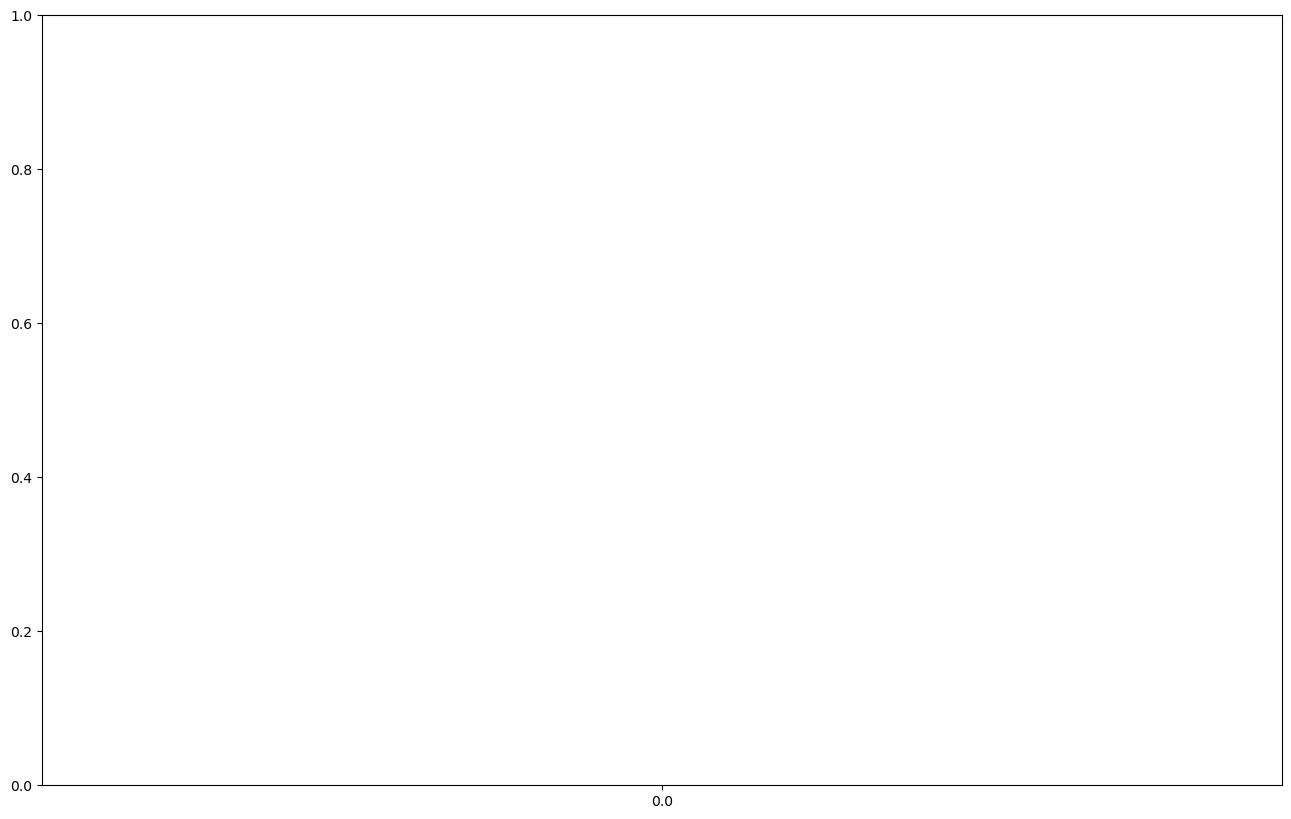

In [13]:
plt.figure(figsize=(16, 10))  # Adjust size as needed

# Create the violin plot
sns.violinplot(x='DEPTH', y='value', hue='mineral', data=data_melted, palette='Set2', split=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Depth')
plt.ylabel('Mineral Value')
plt.title('Distribution of Mineral Values Across Depths')

# Show the plot
plt.show()


### Possible Questions and Answers

1. **Can you describe your process for analyzing a new geochemistry dataset?**
   - **Answer:** My process starts with exploring the dataset to understand its structure and content. I perform data cleaning to handle missing values, outliers, and inconsistencies. Then, I use exploratory data analysis (EDA) to visualize the data and identify patterns or anomalies. I might use statistical methods or machine learning techniques to further analyze the data and derive insights. Finally, I validate my findings and prepare them for presentation or further analysis.

2. **How do you approach anomaly detection in geochemistry data?**
   - **Answer:** Anomaly detection can be approached using statistical methods or machine learning techniques. For statistical methods, I use techniques like Z-scores or IQR (Interquartile Range) to identify outliers. For machine learning, I might use algorithms such as Isolation Forest, One-Class SVM, or autoencoders. I also visualize anomalies to ensure they make sense in the geological context.

3. **What are some common statistical techniques you use for pattern recognition in geological data?**
   - **Answer:** Common techniques include correlation analysis, regression analysis, and principal component analysis (PCA). Correlation analysis helps identify relationships between variables, regression analysis can model these relationships, and PCA helps reduce dimensionality and identify key features.

4. **How would you handle missing values in a geochemistry dataset?**
   - **Answer:** Missing values can be handled through imputation methods, such as mean, median, or mode imputation. Alternatively, I might use more sophisticated techniques like K-nearest neighbors (KNN) imputation or model-based methods. If the missing values are extensive, I might analyze why the data is missing and consider whether to exclude those variables or observations.

5. **How do you validate your findings when analyzing geological data?**
   - **Answer:** Validation involves cross-referencing findings with known geological theories or results from other studies. I also use statistical validation techniques, such as cross-validation for predictive models, and ensure that results are reproducible and consistent.

6. **Can you give an example of a complex geological problem you’ve solved using data science?**
   - **Answer:** In a previous project, I used machine learning algorithms to predict ore deposits by analyzing hyperspectral data. I applied dimensionality reduction techniques like PCA, followed by clustering methods to group similar data points, and then used classification algorithms to predict the likelihood of ore deposits in various locations.


In [ ]:
### Python Coding Examples

import pandas as pd

# Load dataset
df = pd.read_csv('data.csv')

# Display basic information
print(df.info())
print(df.describe())

# Handle missing values
df.fillna(df.mean(), inplace=True)


In [ ]:
### Anomaly Detection using Isolation Forest:**
from sklearn.ensemble import IsolationForest

# Assume 'data' is a DataFrame with your features
model = IsolationForest(contamination=0.01)
df['anomaly'] = model.fit_predict(df)

# -1 indicates anomaly
anomalies = df[df['anomaly'] == -1]

In [ ]:
#Pattern Recognition using PCA:**
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(df)

plt.scatter(components[:, 0], components[:, 1])
plt.title('PCA of Geochemistry Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#Correlation Analysis:**
correlation_matrix = df.corr()
print(correlation_matrix)

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Regression Analysis:**
from sklearn.linear_model import LinearRegression

# Assume 'X' is your feature matrix and 'y' is the target variable
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

import matplotlib.pyplot as plt
plt.scatter(y, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

### Tips for the Interview

- **Understand the Problem:** Make sure you clearly understand the geological problem presented and the context. Ask clarifying questions if needed.
- **Data Preparation:** Be ready to clean and prepare the dataset quickly during the interview.
- **Communicate Your Approach:** Explain your thought process and rationale for choosing specific methods or techniques.
- **Visualizations:** Use visualizations to support your analysis and make your findings clearer.

Good luck with your interview! If you need more specific examples or details, just let me know.